In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df.shape

(7613, 5)

In [6]:
df['text'][44]

'I wanted to set Chicago ablaze with my preaching... But not my hotel! http://t.co/o9qknbfOFX'

In [7]:
df['text'][78]

'I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM'

In [9]:
df1=df.fillna('a')

In [11]:
df1.head()

,id,keyword,location,text,target
0,1,a,a,Our Deeds are the Reason of this #earthquake M...,1
1,4,a,a,Forest fire near La Ronge Sask. Canada,1
2,5,a,a,All residents asked to 'shelter in place' are ...,1
3,6,a,a,"13,000 people receive #wildfires evacuation or...",1
4,7,a,a,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
df1['length']=df1['text'].apply(len)

In [14]:
df1.head()

,id,keyword,location,text,target,length
0,1,a,a,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,a,a,Forest fire near La Ronge Sask. Canada,1,38
2,5,a,a,All residents asked to 'shelter in place' are ...,1,133
3,6,a,a,"13,000 people receive #wildfires evacuation or...",1,65
4,7,a,a,Just got sent this photo from Ruby #Alaska as ...,1,88


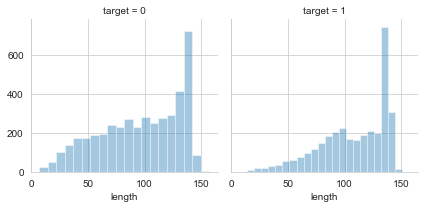

In [15]:
sns.set_style('whitegrid')
g=sns.FacetGrid(data=df1,col='target')
g.map(sns.distplot,'length',kde=False)

In [16]:
df1[df1['length']>130]

,id,keyword,location,text,target,length
2,5,a,a,All residents asked to 'shelter in place' are ...,1,133
38,56,ablaze,a,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,140
49,71,ablaze,England.,First night with retainers in. It's quite weir...,0,138
52,76,ablaze,Barbados,SANTA CRUZ ÛÓ Head of the St Elizabeth Police...,0,134
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,1,135
...,...,...,...,...,...,...
7599,10854,a,a,1.3 #Earthquake in 9Km Ssw Of Anza California ...,1,131
7603,10862,a,a,Officials say a quarantine is in place at an A...,1,136
7604,10863,a,a,#WorldNews Fallen powerlines on G:link tram: U...,1,136
7607,10867,a,a,#stormchase Violent Record Breaking EF-5 El Re...,1,134


In [31]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range (0,len(df1)):
    review=re.sub('[^a-zA-Z]',' ',df1['text'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [41]:
x=pd.DataFrame(corpus,columns=['texts'])

In [44]:
df1.shape

(7613, 6)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer




In [46]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [47]:
pipeline.fit(x['texts'],df1['target'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [49]:
df2=pd.read_csv('test.csv')

In [53]:
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [56]:
df2.apply(len)

id          3263
keyword     3263
location    3263
text        3263
dtype: int64

In [58]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpuss=[]
for i in range (0,len(df2)):
    review=re.sub('[^a-zA-Z]',' ',df2['text'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpuss.append(review)

In [60]:
df3=pd.DataFrame(corpuss,columns=['texts'])

In [61]:
df3

,texts
0,happen terribl car crash
1,heard earthquak differ citi stay safe everyon
2,forest fire spot pond gees flee across street ...
3,apocalyps light spokan wildfir
4,typhoon soudelor kill china taiwan
...,...
3258,earthquak safeti lo angel safeti fasten xrwn
3259,storm ri wors last hurrican citi amp other har...
3260,green line derail chicago http co utbxlcbiuy
3261,meg issu hazard weather outlook hwo http co x ...


In [62]:
p=pipeline.predict(df3['texts'])

In [63]:
p

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [67]:
df5=pd.read_csv('sample_Submission.csv')

In [68]:
df5.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [87]:
df6=pd.DataFrame([df2['id'],p],index=['id','target'])

In [89]:
df6

,0,1,2,3,4,5,6,7,8,9,...,3253,3254,3255,3256,3257,3258,3259,3260,3261,3262
id,0,2,3,9,11,12,21,22,27,29,...,10838,10845,10856,10857,10858,10861,10865,10868,10874,10875
target,1,0,1,1,1,1,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1


In [91]:
df7=df6.transpose()

In [93]:
df7

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
